<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/C%C3%B3pia_de_Simula%C3%A7%C3%A3o_de_Investimentos_(USA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "200">

# **Simulação de Carteiras**

<center><img src = "https://github.com/victorncg/financas_quantitativas/blob/main/Captura%20de%20tela%202023-07-25%20154454.png?raw=true" width = "500">




**Para fins de simplificação**

* Apenas um aporte em cada ação
* Os aportes foram todos no mesmo dia

# 1. Importação das bibliotecas

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

# 2. Configurar a nossa carteira

In [21]:
compras = {'JPST': 34, 'VTIP': 100,
          'VT': 33, 'JEPI':81}

In [30]:
compras

{'JPST': 34, 'VTIP': 100, 'VT': 33, 'JEPI': 81}

In [22]:
list(compras.keys())

['JPST', 'VTIP', 'VT', 'JEPI']

In [23]:
sum(compras.values())

248

# 3. Importando os dados

In [24]:
inicio = '2023-03-06'
fim = '2023-09-15'

In [25]:
precos = yf.download(list(compras.keys()), start = inicio, end = fim, progress = False)['Adj Close']

In [26]:
precos

,JEPI,JPST,VT,VTIP
Date,,,,
2023-03-06,52.982250,49.380516,90.734917,46.665482
2023-03-07,52.345798,49.370678,89.348747,46.437317
2023-03-08,52.384964,49.360828,89.586380,46.318268
2023-03-09,51.738720,49.380516,88.111092,46.427391
2023-03-10,51.043518,49.439590,86.893242,46.625797
...,...,...,...,...
2023-09-08,55.180000,50.070000,96.529999,47.400002
2023-09-11,55.400002,50.060001,97.309998,47.430000
2023-09-12,55.180000,50.080002,96.900002,47.430000


# 4. Simulação da carteira fictícia

In [27]:
#primeiro = precos[Date=inicio]
primeiro=precos.iloc[0]

In [20]:
primeiro

JEPI    52.982250
JPST    49.380520
VT      90.734924
VTIP    46.665482
Name: 2023-03-06 00:00:00, dtype: float64

In [28]:
compras_df = pd.Series(data = compras, index = list(compras.keys()))

In [29]:
compras_df

JPST     34
VTIP    100
VT       33
JEPI     81
dtype: int64

Quantidade de papéis comprados de cada ativo

In [34]:
#qtd_acoes = round(compras_df/primeiro, 0)
qtd_acoes=compras_df

In [35]:
qtd_acoes

JPST     34
VTIP    100
VT       33
JEPI     81
dtype: int64

In [36]:
PL = precos*qtd_acoes

In [37]:
PL['PL Total'] = PL.sum(axis = 1)

In [38]:
PL.head()

,JEPI,JPST,VT,VTIP,PL Total
Date,,,,,
2023-03-06,4291.562267,1678.937546,2994.252251,4666.548157,13631.300220
2023-03-07,4240.009678,1678.603050,2948.508659,4643.731689,13510.853077
2023-03-08,4243.182083,1678.268166,2956.350540,4631.826782,13509.627571
2023-03-09,4190.836315,1678.937546,2907.666023,4642.739105,13420.178989
2023-03-10,4134.524963,1680.946075,2867.476982,4662.579727,13345.527748


In [39]:
PL.tail()

,JEPI,JPST,VT,VTIP,PL Total
Date,,,,,
2023-09-08,4469.580025,1702.379990,3185.489960,4740.000153,14097.450127
2023-09-11,4487.400124,1702.040047,3211.229919,4743.000031,14143.670120
2023-09-12,4469.580025,1702.720062,3197.700050,4743.000031,14113.000168
2023-09-13,4477.679901,1703.399948,3194.070030,4747.000122,14122.150002
2023-09-14,4502.790012,1703.740021,3226.409889,4747.000122,14179.940044


# 5. Comparação com o IBOV

In [46]:
ibov = yf.download('^BVSP', start = inicio, end = fim)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [47]:
ibov

Date
2023-03-06    104700.0
2023-03-07    104228.0
2023-03-08    106540.0
2023-03-09    105071.0
2023-03-10    103618.0
                ...   
2023-09-08    115313.0
2023-09-11    116883.0
2023-09-12    117968.0
2023-09-13    118176.0
2023-09-14    119392.0
Name: Adj Close, Length: 134, dtype: float64

In [48]:
ibov1 = pd.DataFrame(ibov)

In [49]:
ibov1.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

In [50]:
ibov1

,IBOV
Date,
2023-03-06,104700.0
2023-03-07,104228.0
2023-03-08,106540.0
2023-03-09,105071.0
2023-03-10,103618.0
...,...
2023-09-08,115313.0
2023-09-11,116883.0
2023-09-12,117968.0


Juntando tudo num dataframe só

In [51]:
consolidado = pd.merge(ibov1, PL, how = 'inner', on = 'Date')

In [52]:
consolidado.head()

,IBOV,JEPI,JPST,VT,VTIP,PL Total
Date,,,,,,
2023-03-06,104700.0,4291.562267,1678.937546,2994.252251,4666.548157,13631.300220
2023-03-07,104228.0,4240.009678,1678.603050,2948.508659,4643.731689,13510.853077
2023-03-08,106540.0,4243.182083,1678.268166,2956.350540,4631.826782,13509.627571
2023-03-09,105071.0,4190.836315,1678.937546,2907.666023,4642.739105,13420.178989
2023-03-10,103618.0,4134.524963,1680.946075,2867.476982,4662.579727,13345.527748


Normalizando os dados para ajustar a escala

In [53]:
consolidado_ajustado = consolidado/consolidado.iloc[0]

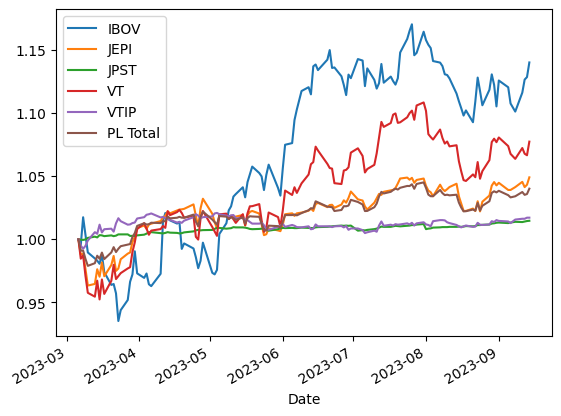

In [54]:
consolidado_ajustado.plot();

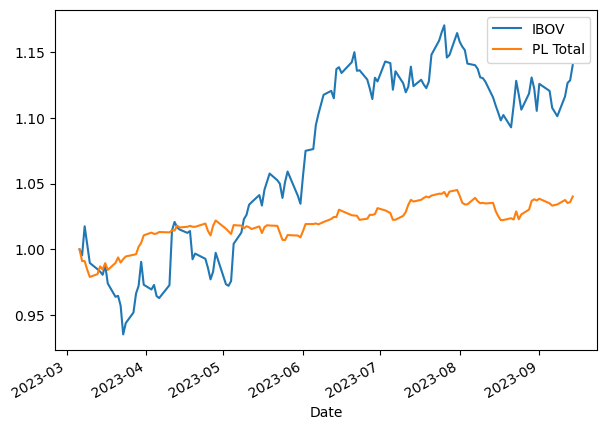

In [55]:
consolidado_ajustado[['IBOV', 'PL Total']].plot(figsize = (7,5));

# 6. Função para testar carteiras

In [56]:
def simulacao_carteira(inicio, fim, carteira):
  precos = yf.download(list(carteira.keys()), start = inicio, end = fim, progress = False)['Adj Close']
  primeiro = precos.iloc[0]
  compras_df = pd.Series(data = carteira, index = list(carteira.keys()))
  qtd_acoes = compras_df/primeiro
  qtd_acoes = round(qtd_acoes,0)
  PL = precos*qtd_acoes
  PL['PL Total'] = PL.sum(axis = 1)
  ibov = yf.download('^BVSP', start = inicio, end =  fim, progress = False)
  ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)
  ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1, inplace = True)
  consolidado = pd.merge(ibov, PL, how = 'inner', on = 'Date')
  consolidado_adj = consolidado/consolidado.iloc[0]
  consolidado_adj[['IBOV', 'PL Total']].plot(figsize = (8,6));

In [57]:
portfolio = {'PETR4.SA': 2000, 'ITUB4.SA': 1000, 'WEGE3.SA': 2000, 'VALE3.SA': 1000}

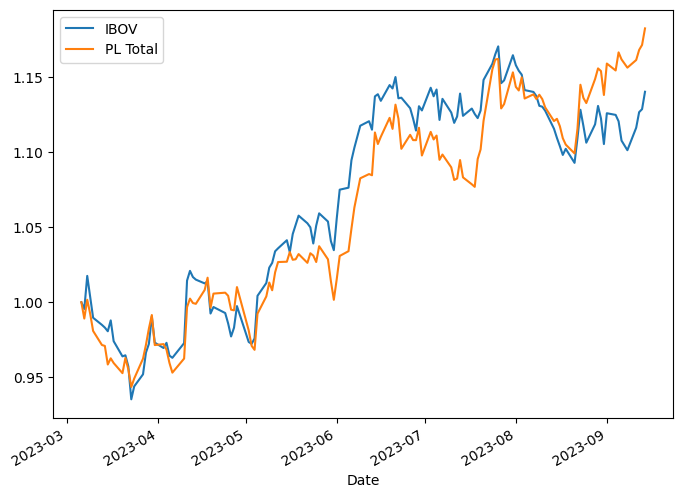

In [58]:
simulacao_carteira(inicio, fim, portfolio)